## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## Reading the datasets

In [2]:
deliveries = pd.read_csv(r'deliveries.csv')
matches = pd.read_csv(r'matches.csv')

## Pre-processing the given dataset

In [3]:
### The given dataset has mistaken two names for the same team 'Rising Pune Supergiants'
deliveries = deliveries.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 
matches = matches.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 

### 'Delhi Daredevils' later changed their name to 'Delhi Capitals'
deliveries = deliveries.replace(to_replace="Delhi Daredevils", value ="Delhi Capitals") 
matches = matches.replace(to_replace="Delhi Daredevils", value="Delhi Capitals") 

### 'Deccan Chargers' announced a sale of their team and got a new name as 'Sunrisers Hyderabad'
deliveries = deliveries.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")
matches=matches.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")

In [4]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


## Analysing the most successful team

In [5]:
# ASKING USER WHETHER TO SAVE THE PLOT ON THE DISK OR NOT 

if (input("Save/download plots? y/n: ").lower()[0] == 'y'):
  save_files = True
  print("\nPlots will be saved/downloaded.")
else:
  save_files = False
  print("Plots will not be saved/downloaded.")

Save/download plots? y/n: n
Plots will not be saved/downloaded.


In [6]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

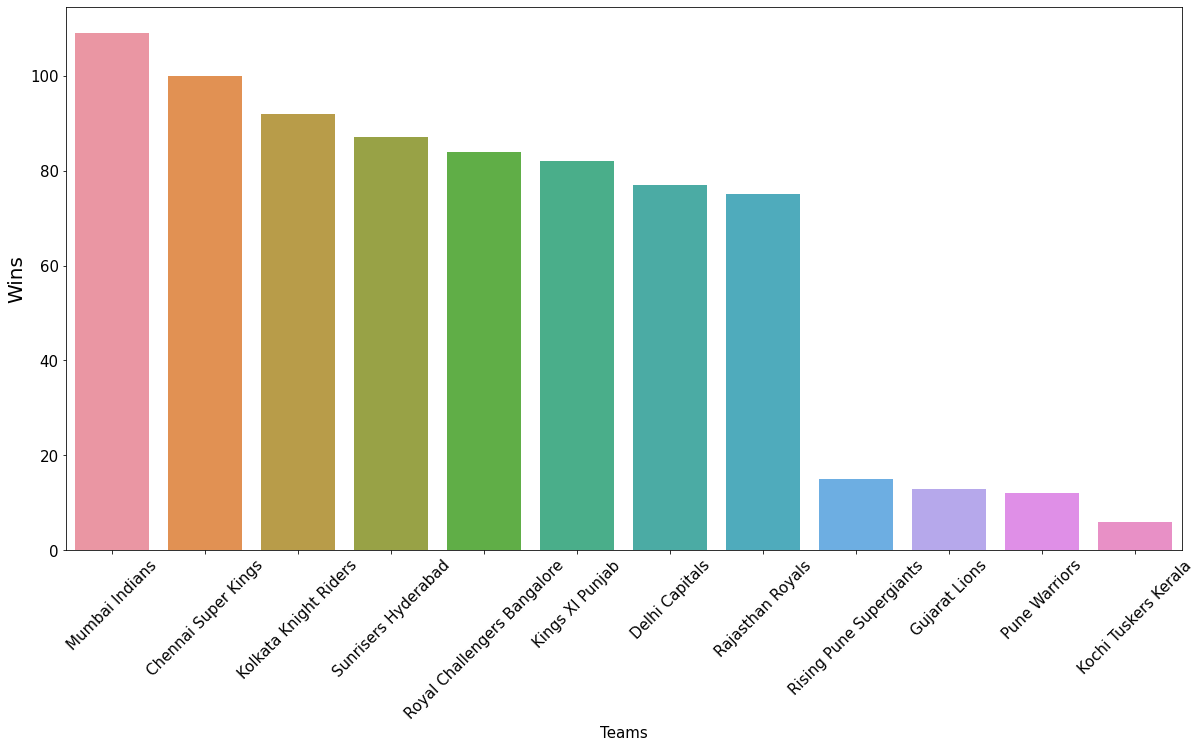

In [7]:
team_wins = matches.winner.value_counts()
fig = plt.figure(figsize = (20, 10))
ax = sns.barplot(x=team_wins.index,y=team_wins)

ax.set_ylabel('Wins', fontsize=20)
ax.set_xlabel('Teams', fontsize=15)

plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/teams_and_wins'
  plt.savefig(filename, bbox_inches = 'tight')